In [1]:
import numpy as np
import pandas as pd


import json
import requests
from pprint import pprint

import matplotlib.pyplot as plt


In [2]:
file_path = "Resources/Chicago_Health_Suicide_Mortality_Rate.csv"
suicide_df= pd.read_csv(file_path)
#suicide_df

In [3]:
suicide_cleaned = suicide_df.drop(index=[0,0])

suicide_cleaned = suicide_cleaned[suicide_cleaned.columns[::]]
#suicide_cleaned

In [4]:
suicide_official_df = suicide_cleaned.drop(columns = ['Layer', 'GEOID', 'Population', 'Longitude', 'Latitude'])

suicide_official_df

,Name,VRSUR_2015-2019,VRSUR_2011-2015
1,Rogers Park,9.9,7.4
2,Norwood Park,12.7,8.9
3,Jefferson Park,11.8,15.5
4,Forest Glen,3.5,7.3
5,North Park,11.7,4.9
...,...,...,...
73,Morgan Park,7.0,9.7
74,O'Hare,8.7,4.4
75,Edgewater,11.1,9.4
76,Near North Side,11.9,9.9


In [5]:
file_path = "Resources/Chicago_Health_Vacant.csv"
vacant_df= pd.read_csv(file_path)
#vacant_df

In [6]:
#vacant_cleaned_df = vacant_df.drop(columns=['Layer'])
vacant_cleaned_df = vacant_df.drop(index=0)
vacant_cleaned_df

vacant_cleaned_df_1 = vacant_cleaned_df.drop(index=1)
vacant_cleaned_df_1

vacant_cleaned_df_2 = vacant_cleaned_df_1.drop(index=2)
vacant_cleaned_df_2

vacant_clean_df = vacant_cleaned_df_2.drop(index=3)

vacant_clean_df = vacant_clean_df[vacant_clean_df.columns[::]]


#vacant_clean_df

In [7]:
vacant_official_df = vacant_clean_df.drop(columns = ['Layer', 'GEOID', 'Population', 'Longitude', 'Latitude', 
                                                     'VAC_2016-2020', 'VAC_2014-2018', 'VAC_2013-2017', 'VAC_2012-2016', 
                                                     'VAC_2010-2014', 'VAC_2009-2013', 'VAC_2008-2012', 'VAC_2007-2011',
                                                    'VAC_2006-2010'])

vacant_official_df

,Name,VAC_2015-2019,VAC_2011-2015
4,Rogers Park,10.6382482004574,13.8297141729273
5,Norwood Park,4.35432513032787,8.67433597436449
6,Jefferson Park,7.92739376926656,7.26486363440337
7,Forest Glen,4.11510077162596,7.15623295558446
8,North Park,6.04790789525856,5.7675729922983
...,...,...,...
76,Morgan Park,10.2834612753944,9.89671371095077
77,O'Hare,5.10215095380747,5.68235944599892
78,Edgewater,9.1925208102439,10.6093749547342
79,Near North Side,13.5890301824373,13.5278999899642


In [13]:
merged_df = pd.merge(suicide_official_df, vacant_official_df, on=["Name"])
merged_df

,Name,VRSUR_2015-2019,VRSUR_2011-2015,VAC_2015-2019,VAC_2011-2015
0,Rogers Park,9.9,7.4,10.6382482004574,13.8297141729273
1,Norwood Park,12.7,8.9,4.35432513032787,8.67433597436449
2,Jefferson Park,11.8,15.5,7.92739376926656,7.26486363440337
3,Forest Glen,3.5,7.3,4.11510077162596,7.15623295558446
4,North Park,11.7,4.9,6.04790789525856,5.7675729922983
...,...,...,...,...,...
72,Morgan Park,7.0,9.7,10.2834612753944,9.89671371095077
73,O'Hare,8.7,4.4,5.10215095380747,5.68235944599892
74,Edgewater,11.1,9.4,9.1925208102439,10.6093749547342
75,Near North Side,11.9,9.9,13.5890301824373,13.5278999899642


In [30]:
merged_2011_df = merged_df.drop(columns = ['VRSUR_2015-2019', 'VAC_2015-2019'])
merged_2011_df


renamed_2011_df = merged_2011_df.rename(columns = {'VRSUR_2011-2015': 'Suicide Mortality Rate',
                                                  'VAC_2011-2015': "Vacant Housing Units"})
renamed_2011_df

,Name,Suicide Mortality Rate,Vacant Housing Units
0,Rogers Park,7.4,13.8297141729273
1,Norwood Park,8.9,8.67433597436449
2,Jefferson Park,15.5,7.26486363440337
3,Forest Glen,7.3,7.15623295558446
4,North Park,4.9,5.7675729922983
...,...,...,...
72,Morgan Park,9.7,9.89671371095077
73,O'Hare,4.4,5.68235944599892
74,Edgewater,9.4,10.6093749547342
75,Near North Side,9.9,13.5278999899642


<AxesSubplot:title={'center':'Suicide Mortality Rate vs Vacant Housing Units (2011-2015)'}, xlabel='Suicide Mortality Rate', ylabel='Vacant Housing Units'>

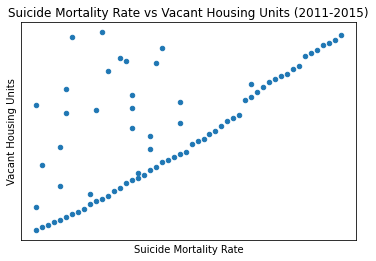

In [45]:
scatter_2011 = renamed_2011_df.plot.scatter(x = 'Suicide Mortality Rate',
                                          y = 'Vacant Housing Units', 
                                           yticks = [],
                                          xticks = [],
                                            title = "Suicide Mortality Rate vs Vacant Housing Units (2011-2015)")

scatter_2011

In [41]:
merged_2019_df = merged_df.drop(columns = ['VRSUR_2011-2015', 'VAC_2011-2015'])
merged_2019_df

renamed_2019_df = merged_2019_df.rename(columns = {'VRSUR_2015-2019': 'Suicide Mortality Rate',
                                                  'VAC_2015-2019': "Vacant Housing Units"})
renamed_2019_df

,Name,Suicide Mortality Rate,Vacant Housing Units
0,Rogers Park,9.9,10.6382482004574
1,Norwood Park,12.7,4.35432513032787
2,Jefferson Park,11.8,7.92739376926656
3,Forest Glen,3.5,4.11510077162596
4,North Park,11.7,6.04790789525856
...,...,...,...
72,Morgan Park,7.0,10.2834612753944
73,O'Hare,8.7,5.10215095380747
74,Edgewater,11.1,9.1925208102439
75,Near North Side,11.9,13.5890301824373


<AxesSubplot:title={'center':'Suicide Mortality Rate vs Vacant Housing Units (2015-2019)'}, xlabel='Suicide Mortality Rate', ylabel='Vacant Housing Units'>

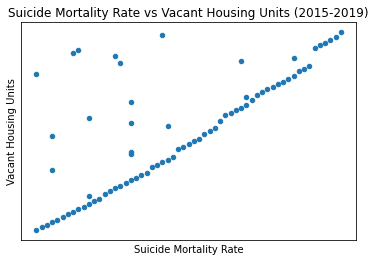

In [50]:
scatter_2019 = renamed_2019_df.plot.scatter(x = 'Suicide Mortality Rate',
                                          y = 'Vacant Housing Units', 
                                           yticks = [],
                                          xticks = [],
                                           title = "Suicide Mortality Rate vs Vacant Housing Units (2015-2019)",
                                           )

scatter_2019